<a href="https://colab.research.google.com/github/quruis/2460_Presentation/blob/main/CodingAppSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<ipython-input-2-c0ac8667ee17>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, error_bad_lines=False)


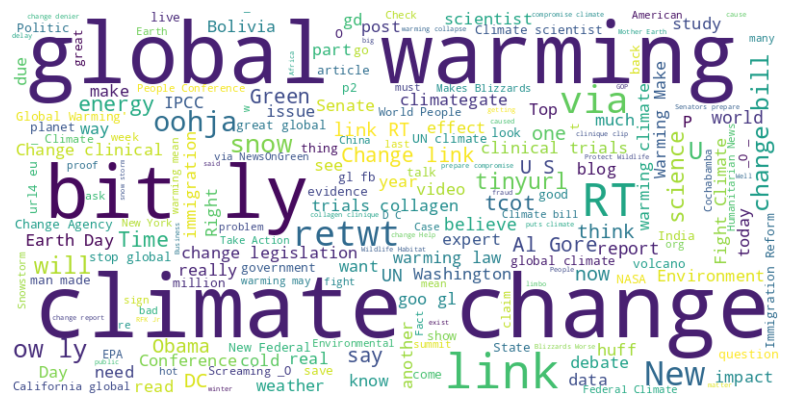

In [ ]:
# Load CSV file into a DataFrame
# https://data.world/crowdflower/sentiment-of-climate-change/activity
url = 'https://github.com/quruis/2460_Presentation/raw/main/Tweets_CC.csv'
df = pd.read_csv(url, error_bad_lines=False)

# Assuming your CSV has a column named 'tweet' containing the textual data
text_data = ' '.join(df['tweet'].astype(str).values)

# Create WordCloud object without using frequencies
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    contour_width=1,
    contour_color='black',
    max_words=200,
    random_state=42
).generate(text_data)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def train_sentiment_model(train_data):
    # Create a TextBlob object for each sentence in the training data
    train_data['Predicted_Sentiment'] = train_data['tweet'].apply(lambda x: analyze_sentiment_textblob(x))

    # Print classification report
    print("Classification Report:")
    print(classification_report(train_data['sentiment'], train_data['Predicted_Sentiment']))

def analyze_sentiment_textblob(sentence):
    # Create a TextBlob object for the given sentence
    blob = TextBlob(sentence)

    # Get the sentiment polarity
    sentiment_polarity = blob.sentiment.polarity

    # Classify sentiment based on polarity
    if sentiment_polarity > 0:
        return "Positive"
    elif sentiment_polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
train_data.head()

In [ ]:
# Read training data from a CSV file with labels
train_csv_file_path = "https://raw.githubusercontent.com/quruis/2460_Presentation/main/Train_Tweets_CC.csv"  # Replace with the path to your training data CSV file
train_data = pd.read_csv(train_csv_file_path)

# Read test data from a CSV file without labels
test_csv_file_path = "https://raw.githubusercontent.com/quruis/2460_Presentation/main/Tweets_CC.csv"  # Replace with the path to your test data CSV file
test_data = pd.read_csv(test_csv_file_path)

# Train the sentiment analysis model on the training set
train_sentiment_model(train_data)

# Initialize counters for the test set without labels
positive_count = 0
neutral_count = 0
negative_count = 0

# Analyze each sentence in the test set without labels using TextBlob and count sentiments
for index, row in test_data.iterrows():
    text = row['tweet']  # Replace 'Text' with the actual column name in your CSV file

    sentiment = analyze_sentiment_textblob(text)

    if sentiment == "Positive":
        positive_count += 1
    elif sentiment == "Negative":
        negative_count += 1
    else:
        neutral_count += 1

    # Print sentiment for each sentence in the test set without labels
    print(f"Text: {text}\nSentiment: {sentiment}\n")


Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       0.0
     Neutral       0.00      0.00      0.00       0.0
    Positive       0.00      0.00      0.00       0.0
    negative       0.00      0.00      0.00      29.0
     neutral       0.00      0.00      0.00      30.0
    positive       0.00      0.00      0.00      41.0

    accuracy                           0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0

Text: Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]
Sentiment: Neutral

Text: Fighting poverty and global warming in Africa [link]
Sentiment: Neutral

Text: Carbon offsets: How a Vatican forest failed to reduce global warming [link]
Sentiment: Negative

Text: Carbon offsets: How a Vatican forest failed to reduce global warming [link]
Sentiment: Negative

Text

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Streaming output truncated to the last 5000 lines.
Sentiment: Neutral

Text: Legislature: global warming is a conspiracy: Examiner.com AP Photo State Representative Mike Noel-R, Kanab, believ... http://bit.ly/dvCD9W
Sentiment: Neutral

Text: Climate change?: RT @CNNInternatDesk 'Snowmageddon' slams WA -Close to 20 inches of snow piled up...cutting power to hundreds of thousands.
Sentiment: Neutral

Text: Stossel Show - Global Warming & The Free Market vs. Gov Subsidy http://bit.ly/bJ4nh5 #climate #green #Libertarian #nuclear #p2 #tlot
Sentiment: Positive

Text: Democratic Party supports Prostitution, Abortion, Pot, Homosexuality, NAMBLA  Global Warming ACORN ECIU stopbeck #tcot @Glenn Beck Fox News
Sentiment: Neutral

Text: Stossel Show - Global Warming! The high cost to the worlds poor http://bit.ly/dtUrLg #climate #climategate #libertarian #tlot #tcot #p2
Sentiment: Negative

Text: We know what Global Warming is, but whats \"Global Dimming\"?  predecessors .
Sentiment: Neutral

Text:

In [ ]:
# Print sentiment counts for the test set without labels
print(f"Positive Count (Test Set without Labels): {positive_count}")
print(f"Neutral Count (Test Set without Labels): {neutral_count}")
print(f"Negative Count (Test Set without Labels): {negative_count}")

Positive Count (Test Set without Labels): 1970
Neutral Count (Test Set without Labels): 2857
Negative Count (Test Set without Labels): 1263


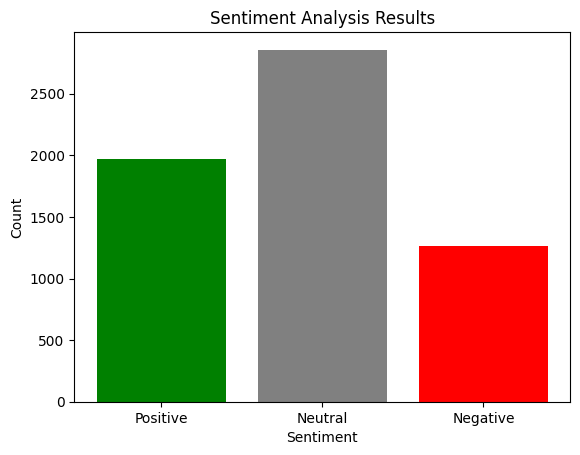

In [ ]:
def generate_bar_chart(positive_count, neutral_count, negative_count):
    # Data
    categories = ['Positive', 'Neutral', 'Negative']
    counts = [positive_count, neutral_count, negative_count]

    # Create bar chart
    plt.bar(categories, counts, color=['green', 'gray', 'red'])

    # Adding labels and title
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Analysis Results')

    # Show the plot
    plt.show()

# Call the function with example values
generate_bar_chart(positive_count, neutral_count, negative_count)
